# Feladat 1 (2 pont)

Ebben a feladatban az `egbolt.pkl` nevű a `pickle` csomag segítségével írt file-t fogjátok vizsgálni. A feladat további részletezése magában az `egbolt.pkl` file-ban található.
A `pickle` modul `load` függvénye segítségével hajtsuk végre a feladatot! Segítségül 16 db objektum van tárolva a file-ba!

In [1]:
%pylab inline
import pickle as pkl
from statistics import mean #ezekre lesz szükség a feladat megoldásához

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("egbolt.pkl","rb") as file:#először megnézzük a feladatot
    for i in range(16): #tudjuk, hogy 16 sor a pickle, ezeken végig iterálunk a loaddal
        print(pkl.load(file))

Ebben a bináris fájlban a napnyugta utáni égboltról készült fekete-fehér felvételek vannak tárolva.
A következő 7 sorban a feladatok vannak részeletezve, majd a 3 kép, köztük üres sorokkal.
1, Olvasd be a 3 felvételt!
2, A képek átlagos fényessége alapján milyen sorrendben készültek a felvételek?
Erről készíts egy olyan ábrát, ahol a három felvétel egymás mellett szerepel három subploton.
Ezeknek a címe az legyen, hogy hanyadikként olvastad be a fájlból.
Mivel ezek fényképek, nem pedig grafikonok, ne legyen tengely feltüntetve körülöttük.
Ügyelj arra, hogy fekete-fehér képként jelenjenek meg.
3, A legfényesebb pont hány pixelnyit mozdult el a sorba rakott képek közül az első és az utolsó között?

[[0.03142941 0.03142941 0.03142941 ... 0.03142941 0.03142941 0.03142941]
 [0.03373137 0.03373137 0.03373137 ... 0.03373137 0.03373137 0.03373137]
 [0.03373137 0.03373137 0.03373137 ... 0.03373137 0.03373137 0.03373137]
 ...
 [0.21461255 0.21461255 0.21533765 ... 0.26218785 0.26101569 0.2621878

Most, hogy már tudjuk a feladatot, elkezdhetjük megcsinálni

In [3]:
sorok = [] #ebbe a tömbbe gyűjtjük majd ki a sorokat

with (open("egbolt.pkl", "rb")) as file: #újra meg kell nyitni a filet
    while True:
        try: #minden sort appendáljon a sorok tömbhöz, amíg vannak sorok
            sorok.append(pkl.load(file))
        except EOFError: #ha end of file errort kap
            break #akkor lépjen ki

In [4]:
a, b, c = sorok[10:15:2] #a,b,c lesz a 3 szükséges array, amiket úgy állítunk elő, 
                         #hogy a sorok 10. és 15. eleme közt minden második elemet kiveszünk

In [5]:
print(numpy.mean(a)) #ahhoz, hogy megnézzük hogy melyik kép a legfényesebb, vennünk kell az arrayek átlagát,
print(numpy.mean(b)) #ebből kiderül hogy melyiken van a legtöbb világos pixel ->melyik a legfényesebb
print(numpy.mean(c))

0.12156168054580256
0.1730840680636764
0.16209143724373995


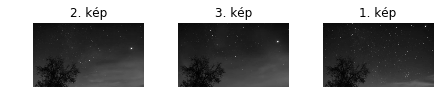

In [13]:
fig, axs = plt.subplots(1, 3, constrained_layout=True) #egy sorban legyen a 3 subplot

axs[0].imshow(b, cmap = 'gray') #az első kép pozíciója, beállítjuk, hogy fekete-fehér legyen a cmap segítségével
axs[0].set_title('2. kép') #kép címe
axs[0].axis('off') #tengelyek kikapcsolása

axs[1].imshow(c, cmap = 'gray') #fényességi sorrendben a c kép a következő
axs[1].set_title('3. kép')
axs[1].axis('off')

axs[2].imshow(a, cmap = 'gray')#majd a b
axs[2].set_title('1. kép')
axs[2].axis('off')

plt.show() #printelje ki a 3 képet

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()